In [2]:

%matplotlib inline
from new_import import *


# Dask gateway
cluster, client = notebook_utils.initialize_dask(use_gateway=True, workers=(1,4))
dc = datacube.Datacube()


# Configure s3 access
configure_s3_access(aws_unsigned=False, requester_pays=True, client=client)




Starting new cluster.


In [3]:
ds = dc.load(
    product="sentinel1_grd_gamma0_20m",
    x=(105.5, 106.4),
    y=(9.2, 10.0),
    time=("2022-09-01", "2023-10-01"),
    measurements=["vv", "vh"],
    output_crs="EPSG:32648",
    resolution=(-10,10),
    dask_chunks={"x":2048, "y":2048},
    skip_broken_datasets=True,
    group_by="solar_day"
)
notebook_utils.heading(notebook_utils.xarray_object_size(ds))
ds

<xarray.Dataset>
Dimensions:      (time: 33, y: 8874, x: 9902)
Coordinates:
  * time         (time) datetime64[ns] 2022-09-06T22:46:14.500000 ... 2023-09...
  * y            (y) float64 1.106e+06 1.106e+06 ... 1.017e+06 1.017e+06
  * x            (x) float64 5.548e+05 5.548e+05 ... 6.538e+05 6.538e+05
    spatial_ref  int32 32648
Data variables:
    vv           (time, y, x) float32 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    vh           (time, y, x) float32 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
Attributes:
    crs:           EPSG:32648
    grid_mapping:  spatial_ref

In [18]:
vh = ds.vh.resample(time='1M').mean().persist()
vh = vh.compute()
vv = ds.vv.resample(time='1M').mean().persist()
vv = vv.compute()



In [28]:
vv.min()

<xarray.DataArray 'vv' ()>
array(-79.01979828)
Coordinates:
    spatial_ref  int32 32648

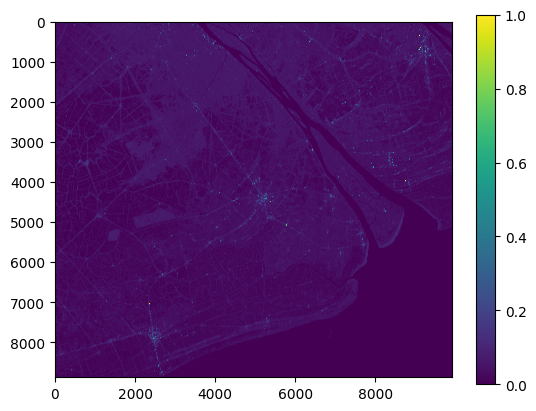

In [33]:
import matplotlib.pyplot as plt

# Plot the data
plt.imshow(vh.isel(time=0), cmap='viridis', vmin=0, vmax=1)
plt.colorbar()  # Add colorbar for reference
plt.show()
